### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [3]:
pd.set_option('display.max_columns', None)

# Optional: Adjust the number of rows to display (if needed)
pd.set_option('display.max_rows', 15)

# Read your file again and display it
file_path = "/Supermarket-December-2017.xlsx"
df = pd.read_excel(file_path)
print(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       KD_SBR TP_TRN  KDSUP  KAS TRN_DK GDG   GGD  KDSLS      KEL     ITEM  \
0          IN    JUL    NaN  6.0      K   A  AREA    NaN   KERTAS  39390.0   
1          IN    JUL    NaN  6.0      K   A  AREA    NaN  BTL/DOT  13108.0   
2          IN    JUL    NaN  6.0      K   A  AREA    NaN  MUSTIKA   5644.0   
3          IN    JUL    NaN  6.0      K   A  AREA    NaN  SABUN.C   7273.0   
4          IN    JUL    NaN  6.0      K   A  AREA    NaN  LULURMD  12168.0   
...       ...    ...    ...  ...    ...  ..   ...    ...      ...      ...   
148484     IN    ADJ    NaN  NaN      D   A  AREA    NaN    BERAS  39027.0   
148485     IN    JUL  999.0  7.0      K   A  AREA    NaN    BERAS  39027.0   
148486     IN    JUL   29.0  7.0      K   A  AREA    NaN    TELUR  15279.0   
148487     IN    ADJ    NaN  NaN      D   A  AREA    NaN  BISCPAK  52746.0   
148488     IN    JUL    NaN  7.0      K   A  AREA    NaN  BISCPAK  52746.0   

                        NAMA   BIN  KDBIN  TGL_TRANS     NO_BKT

**Understading the Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,148486.000000,145702.000000,9350.000000,148486.000000,148486.000000,146957.000000,14695.000000,10753.000000,0.0,0.0,0.0,10879.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,146600.000000,9350.000000,9350.000000,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,3.163174,21828.817133,20286.487016,19901.017212,21795.990560,0.437617,2.995218,0.402527,NaN,NaN,NaN,22094.795018,1.848663,395.584588,387.137540,3.703390,0.339132,0.334158,3.749733,0.000160,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,1.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,1.000000,4500.000000,4500.000000,3728.920000,4425.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,5000.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,1.000000,9700.000000,10302.000000,8365.180000,9600.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,11000.000000,0.000000,0.000000,184.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,2.000000,20250.000000,19786.940000,17769.380000,20200.000000,0.000000,3.000000,0.000000,NaN,NaN,NaN,23000.000000,0.000000,0.000000,603.000000,4.000000,0.000000,0.000000,10.000000,0.000000,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,2000.000000,700000.000000,517273.000000,720000.000000,900000.000000,50.000000,50.000000,31.400000,NaN,NaN,NaN,536900.000000,6250.000000,120600.000000,1769.000000,40.000000,31.400000,10.000000,10.000000,0.100000,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,16.266576,40163.889928,34874.831844,38566.965857,40289.934102,2.475039,5.732793,1.739868,NaN,NaN,NaN,36368.941118,103.933377,2753.395563,471.396592,6.200473,1.727602,1.631778,4.841419,0.004002,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


In [6]:
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,NAMA,BIN,KDBIN,TGL_TRANS,NO_BKT,NO_ORD,STS_BYR,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,KET_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TRNBL,POST,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,KERTAS KADO SINAR DU,NaN,NaN,2017-01-02,060102001,NaN,CD,NaN,NaN,2.0,1100.0,NaN,549.98,1100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2200.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701022e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,PIGEON BTL PP RP 240,NaN,NaN,2017-01-02,060102002,NaN,CD,NaN,NaN,1.0,23000.0,NaN,20640.45,23000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,23000.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701029e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,13.0,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,9500.0,NaN,8720.00,9500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,9500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701030e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,BIORE BF 100ML WHITE,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,6900.0,NaN,6215.00,6900.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6900.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,OVALE LULUR BALI BEN,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,13500.0,NaN,12119.65,13500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,13500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


**Handle Missing Values**

In [7]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [8]:
pd.set_option('display.max_rows', None)  # Show all rows

# Calculate and sort null values
null_counts = df.isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=True)

# Display the sorted null counts
print(sorted_null_counts)

# Reset display options back to default (optional)
pd.reset_option('display.max_rows')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KD_SBR             3
JLH_TRANS          3
KET_TRANS          3
TRNBL              3
HRG_JUL            3
HRG_PKK            3
FILLER             3
QTY                3
NO_BKT             3
TGL_TRANS          3
USER               3
JAM                3
NAMA               3
TP_TRN             3
TRN_DK             3
GDG                3
TANGGAL            3
GGD                3
KEL                3
ITEM               3
DISC            1532
PPN             1889
HRG_OLD         2787
TP_ADJ          9413
STS_BYR        12195
KAS            12195
KDSUP         107657
POST_STOK     108168
DISC1         133794
BIN           134903
SLD_AK        136720
HRGJL_OLD     137610
DISC2         137736
POST          137937
SLD_AKG       139139
HRGBL_OLD     139139
HRGJL1_OLD    139139
PPNBM_OLD     139139
HRGJL2_OLD    139139
PPN_OLD       139139
SUPP_OLD      139139
PPNBM         139139
DISB2_OLD     139139
DISB1_OLD     139139
TGL_OLD       139642
SUPPLIER      141225
GON           141439
KONS         

In [9]:
columns_to_keep = ['TANGGAL', 'JAM', 'NAMA', 'USER', 'QTY', 'HRG_JUL', 'HRG_PKK', 'JLH_TRANS', 'KEL', 'NO_BKT']

# Retain only the specified columns
df_cleaned = df[columns_to_keep]

# Check the remaining DataFrame
print(df_cleaned.info())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TANGGAL    148486 non-null  datetime64[ns]
 1   JAM        148486 non-null  object        
 2   NAMA       148486 non-null  object        
 3   USER       148486 non-null  object        
 4   QTY        148486 non-null  float64       
 5   HRG_JUL    148486 non-null  float64       
 6   HRG_PKK    148486 non-null  float64       
 7   JLH_TRANS  148486 non-null  float64       
 8   KEL        148486 non-null  object        
 9   NO_BKT     148486 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 11.3+ MB
None


In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_cleaned = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

df_cleaned.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
TANGGAL,0
JAM,0
NAMA,0
USER,0
QTY,0
HRG_JUL,0
HRG_PKK,0
JLH_TRANS,0
KEL,0
NO_BKT,0


In [11]:
df_cleaned.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
TANGGAL,0
JAM,0
NAMA,0
USER,0
QTY,0
HRG_JUL,0
HRG_PKK,0
JLH_TRANS,0
KEL,0
NO_BKT,0


**Visualization**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-81498dec7103>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_selling.index, y=top_5_selling.values, palette="mako")


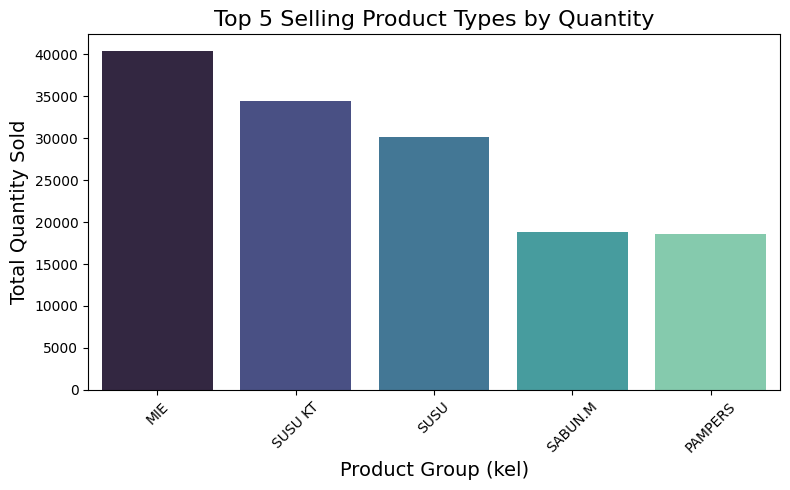

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'kel' and 'qty' are in df_cleaned
columns_to_keep = ['TANGGAL', 'JAM', 'NAMA', 'USER', 'QTY', 'HRG_JUL', 'HRG_PKK', 'JLH_TRANS', 'KEL' , 'NO_BKT']
df_cleaned = df[columns_to_keep]

# Aggregate data by 'kel' (group of product) and sum the quantities
top_selling = df_cleaned.groupby('KEL')['QTY'].sum().sort_values(ascending=False)

# Select the top 5 product groups
top_5_selling = top_selling.head(5)

# Plot the bar chart for the top 5
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_selling.index, y=top_5_selling.values, palette="mako")

# Add titles and labels
plt.title('Top 5 Selling Product Types by Quantity', fontsize=16)
plt.xlabel('Product Group (kel)', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


From this visualization we can see that mie is the most selling group product


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


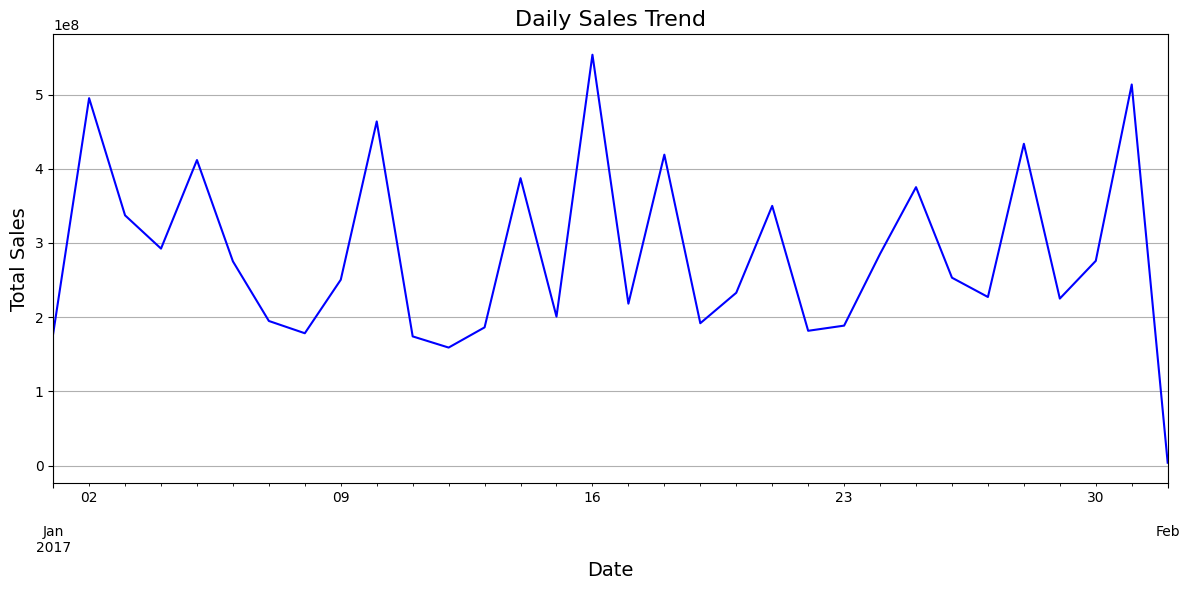

In [13]:
# Aggregate daily sales
sales_trend = df_cleaned.groupby('TANGGAL')['JLH_TRANS'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', color='blue')
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()


From this visualization we can Identify peaks and dips in sales over time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-a64cf6f23df0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['HOUR'] = pd.to_datetime(df_cleaned['JAM']).dt.hour
<ipython-input-14-a64cf6f23df0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['HOUR'] = pd.to_datetime(

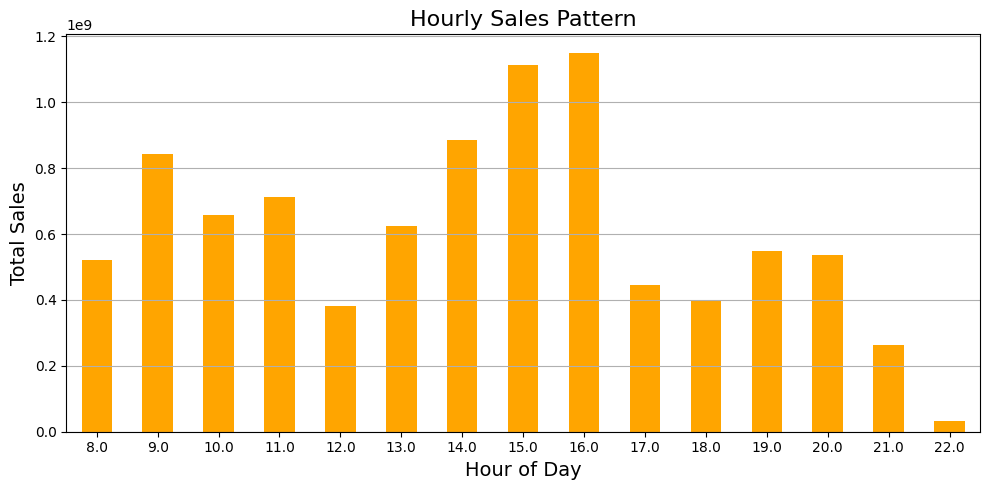

In [14]:
# Extract hour from 'JAM' and group
df_cleaned['HOUR'] = pd.to_datetime(df_cleaned['JAM']).dt.hour
hourly_sales = df_cleaned.groupby('HOUR')['JLH_TRANS'].sum()

# Plot the hourly sales
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar', color='orange')
plt.title('Hourly Sales Pattern', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


From this visualization we can find that 3PM is the peak shopping hour

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-011b0888b0b0>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['HOUR'] = pd.to_datetime(df_cleaned['JAM'], errors='coerce').dt.hour
<ipython-input-15-011b0888b0b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['HOUR'] 

Top 5 Products in the Morning:
KEL
MIE        18004.0
SUSU       13123.0
SABUN.M     9258.0
SUSU KT     8015.0
AIR.M       6827.0
Name: QTY, dtype: float64

Top 5 Products in the Evening:
KEL
SUSU KT    20406.0
MIE        15482.0
SUSU       11783.0
PAMPERS     9983.0
SNACK       7802.0
Name: QTY, dtype: float64

Top 5 Products at Night:
KEL
MIE        6881.0
SUSU KT    5971.0
SUSU       5202.0
SABUN.M    4193.0
PAMPERS    3507.0
Name: QTY, dtype: float64


<ipython-input-15-011b0888b0b0>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_evening.values, y=top_evening.index, ax=axes[1], palette='Greens_r')
<ipython-input-15-011b0888b0b0>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_night.values, y=top_night.index, ax=axes[2], palette='Reds_r')


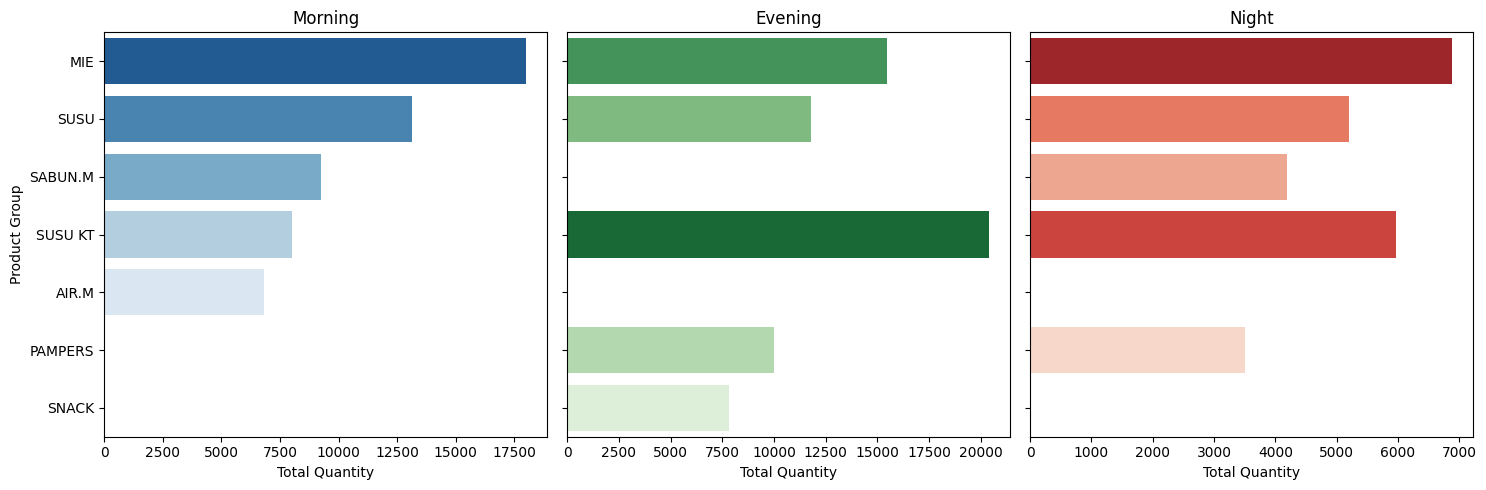

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'JAM' is in the correct datetime format
df_cleaned['HOUR'] = pd.to_datetime(df_cleaned['JAM'], errors='coerce').dt.hour

# Define time periods
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Evening'
    else:
        return 'Night'

# Categorize each transaction into time periods
df_cleaned['Time_Period'] = df_cleaned['HOUR'].apply(categorize_time)

# Function to get top 5 selling products for a specific time period
def get_top_selling(df, time_period):
    filtered_df = df[df['Time_Period'] == time_period]
    top_selling = filtered_df.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(5)
    return top_selling

# Get top 5 products for morning, evening, and night
top_morning = get_top_selling(df_cleaned, 'Morning')
top_evening = get_top_selling(df_cleaned, 'Evening')
top_night = get_top_selling(df_cleaned, 'Night')

# Display results
print("Top 5 Products in the Morning:")
print(top_morning)

print("\nTop 5 Products in the Evening:")
print(top_evening)

print("\nTop 5 Products at Night:")
print(top_night)

# Visualize the top 5 products for each time period
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(x=top_morning.values, y=top_morning.index, ax=axes[0], palette='Blues_r')
axes[0].set_title('Morning')
axes[0].set_xlabel('Total Quantity')
axes[0].set_ylabel('Product Group')

sns.barplot(x=top_evening.values, y=top_evening.index, ax=axes[1], palette='Greens_r')
axes[1].set_title('Evening')
axes[1].set_xlabel('Total Quantity')
axes[1].set_ylabel('')

sns.barplot(x=top_night.values, y=top_night.index, ax=axes[2], palette='Reds_r')
axes[2].set_title('Night')
axes[2].set_xlabel('Total Quantity')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-4ec7b34460c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TANGGAL'] = pd.to_datetime(df_cleaned['TANGGAL'], errors='coerce')
<ipython-input-16-4ec7b34460c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

      Week      KEL     QTY
199      1  SUSU KT  9439.0
113      1      MIE  8211.0
196      1     SUSU  6467.0
431      2     SUSU  8901.0
351      2      MIE  8850.0
434      2  SUSU KT  6296.0
667      3  SUSU KT  8780.0
581      3      MIE  7525.0
664      3     SUSU  6112.0
812      4      MIE  8137.0
898      4  SUSU KT  7380.0
895      4     SUSU  6300.0
1043     5      MIE  6950.0
940      5    AIR.M  2305.0
1088     5  SABUN.M  2202.0


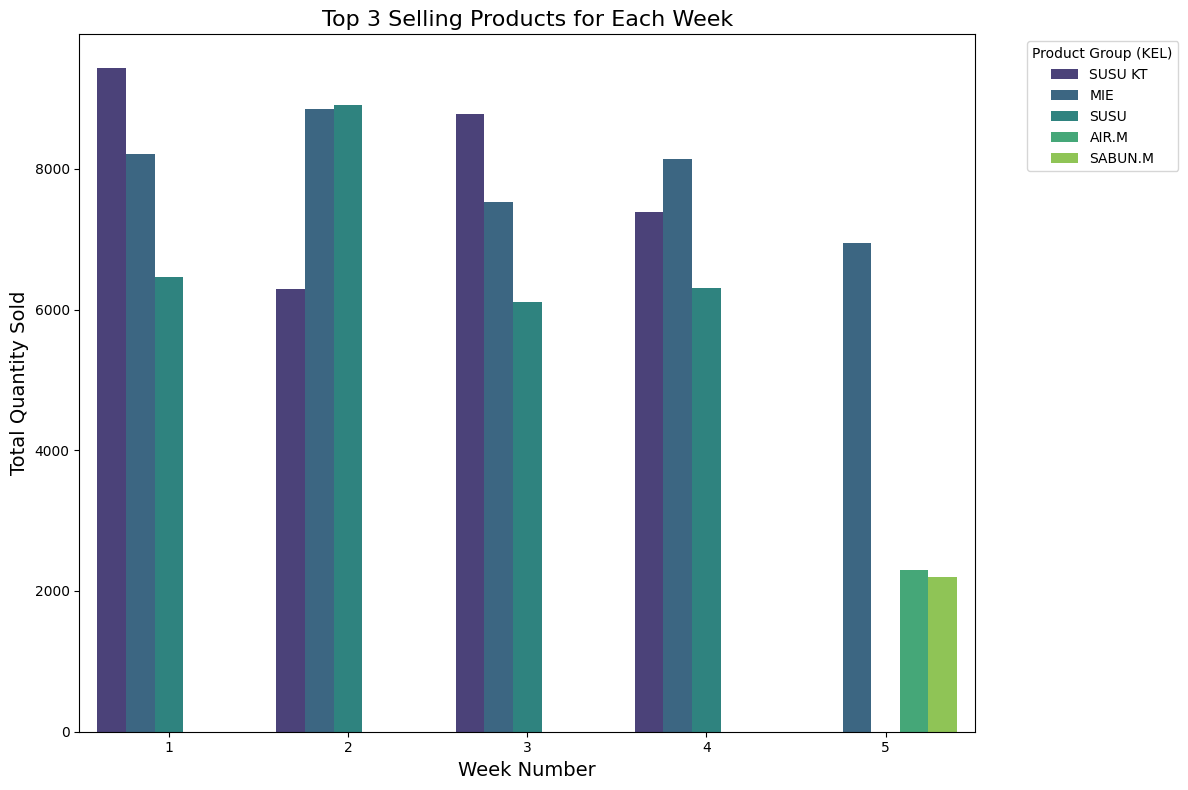

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'TANGGAL' is in datetime format
df_cleaned['TANGGAL'] = pd.to_datetime(df_cleaned['TANGGAL'], errors='coerce')

# Extract week number from 'TANGGAL'
df_cleaned['Week'] = df_cleaned['TANGGAL'].dt.isocalendar().week

# Remove rows where the week is 52
df_cleaned = df_cleaned[df_cleaned['Week'] != 52]

# Group by Week and Product Group (KEL) and calculate total quantity
weekly_sales = df_cleaned.groupby(['Week', 'KEL'])['QTY'].sum().reset_index()

# Sort and pick top 3 for each week
top_weekly_sales = (
    weekly_sales.sort_values(['Week', 'QTY'], ascending=[True, False])
    .groupby('Week')
    .head(3)
)

# Display top 3 products for each week
print(top_weekly_sales)

# Visualize the top 3 products for each week
plt.figure(figsize=(12, 8))
sns.barplot(data=top_weekly_sales, x='Week', y='QTY', hue='KEL', palette='viridis')
plt.title('Top 3 Selling Products for Each Week', fontsize=16)
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.legend(title='Product Group (KEL)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142732 entries, 0 to 148488
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   TANGGAL      142732 non-null  datetime64[ns]
 1   JAM          142732 non-null  object        
 2   NAMA         142732 non-null  object        
 3   USER         142732 non-null  object        
 4   QTY          142732 non-null  float64       
 5   HRG_JUL      142732 non-null  float64       
 6   HRG_PKK      142732 non-null  float64       
 7   JLH_TRANS    142732 non-null  float64       
 8   KEL          142732 non-null  object        
 9   NO_BKT       142732 non-null  object        
 10  HOUR         142732 non-null  float64       
 11  Time_Period  142732 non-null  object        
 12  Week         142732 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), object(6)
memory usage: 14.8+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Apriori Algorithm**

In [18]:
# Create a crosstab of transactions vs items
apriori_data = pd.crosstab(df_cleaned['NO_BKT'], df_cleaned['KEL'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
000

In [19]:
# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-7e98910f9cad>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
000

In [21]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
output = frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.038124,(AIR.M)
1,0.031827,(ASESORS)
2,0.033869,(B DAPUR)
3,0.063881,(BISCPAK)
4,0.023828,(BTL/DOT)
5,0.031714,(COKLAT)
6,0.026267,(DDORANT)
7,0.082858,(DETERJN)
8,0.028792,(GULA)
9,0.021275,(HBL)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.038124,(AIR.M)
1,0.031827,(ASESORS)
2,0.033869,(B DAPUR)
3,0.063881,(BISCPAK)
4,0.023828,(BTL/DOT)
5,0.031714,(COKLAT)
6,0.026267,(DDORANT)
7,0.082858,(DETERJN)
8,0.028792,(GULA)
9,0.021275,(HBL)


In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068476,0.063881,0.021842,0.318973,4.993225,0.017468,1.374569,0.858517
1,(BISCPAK),(SNACK),0.063881,0.068476,0.021842,0.341918,4.993225,0.017468,1.415514,0.854302
2,(MIE),(DETERJN),0.078405,0.082858,0.022721,0.289797,3.497510,0.016225,1.291381,0.774833
3,(DETERJN),(MIE),0.082858,0.078405,0.022721,0.274221,3.497510,0.016225,1.269802,0.778595
4,(DETERJN),(SOFTENR),0.082858,0.042408,0.027033,0.326258,7.693363,0.023519,1.421304,0.948619
5,(SOFTENR),(DETERJN),0.042408,0.082858,0.027033,0.637458,7.693363,0.023519,2.529755,0.908547
6,(SUSU KT),(DETERJN),0.165887,0.082858,0.023346,0.140732,1.698467,0.009600,1.067352,0.493019
7,(DETERJN),(SUSU KT),0.082858,0.165887,0.023346,0.281753,1.698467,0.009600,1.161318,0.448386
8,(P GIGI),(PAMPERS),0.075483,0.139477,0.020339,0.269448,1.931836,0.009811,1.177907,0.521740
9,(PAMPERS),(P GIGI),0.139477,0.075483,0.020339,0.145821,1.931836,0.009811,1.082345,0.560540


Optimize Cross-Selling Opportunities with Strategic Layout Changes:

Group Complementary Products:

Shampoo (SHAMPOO) and Soap (SABUN.M):
These items have a strong association (lift value: 5.46). Position them on adjacent shelves or within a unified personal care section to encourage combined purchases.

Detergent (DETERJN) and Softener (SOFTENR):
With a high lift value of 7.7, these products are frequently bought together. Arrange their shelves side by side in the laundry care area for convenience.

Biscuits (BISCPAK) and Snacks (SNACK):
A lift value of 5.0 highlights their frequent pairing. Display these together in the snack aisle and near checkout counters to drive impulse buys.

Highlight High-Demand Products Strategically:

Milk Powder (SUSU KT) and Detergent (DETERJN):
While their association is moderate (lift = 1.72), milk powder can be placed at the aisle ends near detergent to draw attention and promote pairing.
Promote Bundles:

Toothpaste (P GIGI) and Shampoo (SHAMPOO):
These essentials show a strong connection (lift = 6.03). Offer bundle promotions, such as discounts when purchasing both, to boost sales.
Create Cross-Selling Displays:

Baby Diapers (PAMPERS) and Baby Care Items (e.g., SABUN.M, SHAMPOO):
Designate a specific baby care section, emphasizing deals on frequently purchased combinations to enhance convenience for shoppers.
Encourage Impulse Purchases:

Biscuits (BISCPAK) and Snacks (SNACK):
Given their strong association (lift value: 5.01), position these items near checkout counters to capitalize on last-minute purchase opportunities.
